<a href="https://colab.research.google.com/github/Pranish-Pantha/Machine-Learning/blob/master/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
train_data = pd.read_csv("drive/My Drive/Kaggle/MNIST/train.csv")
test_data = pd.read_csv("drive/My Drive/Kaggle/MNIST/test.csv")


Anwer is 1


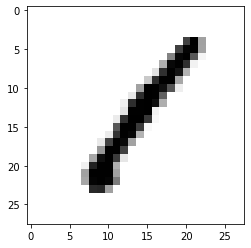

In [0]:
sample = train_data.loc[0][1:]
answer = train_data.loc[0][0]
sample = np.array(sample)
sample = np.split(sample, 28)
plt.imshow(sample, cmap='gray_r')
print("Anwer is {}".format(answer))

Anwer is 2


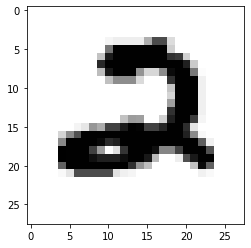

In [0]:
sample = test_data.loc[0]
sample = np.array(sample)
sample = np.split(sample, 28)
plt.imshow(sample, cmap='gray_r')
print("Anwer is {}".format(2))

In [0]:
answers = train_data.get("label")
answers = np.array(answers)
print(train_data.columns)
training = (train_data.get(train_data.columns[1:])).to_numpy() / 255
training = training.reshape(42000, 28, 28, 1)  
print(answers.shape)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
(42000,)


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
answers = to_categorical(answers)

model = Sequential()
model.add(Conv2D(32, (2,2), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(32, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())


model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(training, answers, epochs= 30)


Epoch 1/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5865 - accuracy: 0.8061
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1930 - accuracy: 0.9405
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1462 - accuracy: 0.9548
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1177 - accuracy: 0.9641
Epoch 5/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1024 - accuracy: 0.9689
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0926 - accuracy: 0.9711
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0843 - accuracy: 0.9730
Epoch 8/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0787 - accuracy: 0.9751
Epoch 9/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0736 - accuracy: 0.9772
Epoch 10/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.067

In [0]:

testing = (test_data.get(test_data.columns)).to_numpy() / 255
testing = testing.reshape(28000, 28, 28, 1)
prediction = model.predict(testing)
print(prediction)

[[4.0323873e-09 6.4257978e-15 9.9999976e-01 ... 3.3336686e-10
  9.8301211e-12 1.8782258e-10]
 [9.9923623e-01 6.8880464e-11 7.0398164e-05 ... 3.8644711e-07
  9.4552814e-07 2.1422234e-06]
 [1.5817173e-09 4.3752481e-17 1.7304283e-06 ... 2.7199744e-11
  8.5892561e-06 9.9998915e-01]
 ...
 [1.2067409e-14 7.6368987e-17 5.3644800e-07 ... 3.4633457e-10
  7.9490036e-08 2.4994014e-11]
 [6.4731360e-08 2.7086141e-12 5.6963054e-06 ... 2.1935950e-08
  2.1313091e-09 9.9924350e-01]
 [1.4864425e-10 1.1090226e-19 9.9999988e-01 ... 1.8737227e-12
  2.7665989e-10 1.8927983e-10]]


In [0]:
output = []
for x in range(len(prediction)):
  a = np.where(prediction[x] == max(prediction[x]))
  output.append(int(a[0]))


In [0]:
final = []
for x in range(len(test_data)):
  final.append([x +1, output[x]])
x = np.array(final)
print(x)
df = pd.DataFrame(data=x, columns=["ImageId", "Label"])

[[    1     2]
 [    2     0]
 [    3     9]
 ...
 [27998     3]
 [27999     9]
 [28000     2]]


In [0]:
df.to_csv('drive/My Drive/Kaggle/MNIST/mnist.csv', index = False)